# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
clients = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_clients.csv')
loan_status = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_close_loan.csv')
jobs = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_job.csv')
last_credit = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_last_credit.csv')
loan_history = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_loan.csv')
pens = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_pens.csv')
salary = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_salary.csv')
target = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_target.csv')
work = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_work.csv')


In [3]:
print('clients shape', clients.shape)
print('target shape', target.shape)
print('loan_status shape', loan_status.shape)
print('last_credit shape', last_credit.shape)
print('loan_history shape', loan_history.shape)
print('salary shape', salary.shape)
print('pens shape', pens.shape)
print('work shape', work.shape)
print('jobs shape', jobs.shape)

clients shape (16000, 14)
target shape (15223, 3)
loan_status shape (21126, 2)
last_credit shape (15223, 4)
loan_history shape (21126, 2)
salary shape (15523, 3)
pens shape (2, 3)
work shape (3, 3)
jobs shape (15223, 5)


 кол-во строк в табице target(таблица с целевой переменной) и clients разная.
777 строк по которым нет данных целевой переменной можно будет использовать для обучения модели если будем ее обучать

In [4]:
len(set(clients.ID) - set(target.ID_CLIENT))

777

Так как делать мы будем пока только EDA, то для этих целей, мы оставим в табличке clients только те записи, по которым есть значение целевой переменной

Исследуем таблицы clients и target на наличие дублей, нелогичных данных и пропусков перед тем как их джоинить.

In [5]:
print('Кол-во дублей: ',target.duplicated().sum())
print('Кол-во пропусков:\n',target.isna().sum())
print('Кол-во уникальных клиентов:',target.ID_CLIENT.nunique())
print('Кол-во уникальных рекламных предложений:',target.AGREEMENT_RK.nunique())

Кол-во дублей:  0
Кол-во пропусков:
 AGREEMENT_RK    0
ID_CLIENT       0
TARGET          0
dtype: int64
Кол-во уникальных клиентов: 15223
Кол-во уникальных рекламных предложений: 15223


 - пропусков и дублей нет
 - каждое предложение уникально( по своему номеру так точно)
 - повторяющихся клиентов в таблице нет
    

Рассмотрм таблицу clients

In [6]:
clients.sample(5)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
11665,106819239,39,0,Среднее,Не состоял в браке,2,2,1,0,Челябинская область,Челябинская область,Челябинская область,0,0
2633,106810686,44,1,Среднее,Состою в браке,1,0,1,0,Курганская область,Курганская область,Курганская область,0,0
1210,106820172,27,1,Неоконченное высшее,Разведен(а),1,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0
10992,106820087,23,0,Среднее специальное,Не состоял в браке,0,0,1,0,Удмуртия,Удмуртия,Удмуртия,0,0
3651,106808347,50,1,Среднее,Состою в браке,0,0,1,0,Рязанская область,Рязанская область,Рязанская область,0,0


In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16000 non-null  int64 
 1   AGE                      16000 non-null  int64 
 2   GENDER                   16000 non-null  int64 
 3   EDUCATION                16000 non-null  object
 4   MARITAL_STATUS           16000 non-null  object
 5   CHILD_TOTAL              16000 non-null  int64 
 6   DEPENDANTS               16000 non-null  int64 
 7   SOCSTATUS_WORK_FL        16000 non-null  int64 
 8   SOCSTATUS_PENS_FL        16000 non-null  int64 
 9   REG_ADDRESS_PROVINCE     16000 non-null  object
 10  FACT_ADDRESS_PROVINCE    16000 non-null  object
 11  POSTAL_ADDRESS_PROVINCE  16000 non-null  object
 12  FL_PRESENCE_FL           16000 non-null  int64 
 13  OWN_AUTO                 16000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

In [8]:
clients.duplicated().sum()

0

посмотрим на распределение возраста, для того, чтобы убедиться, что в данных нет странных значений

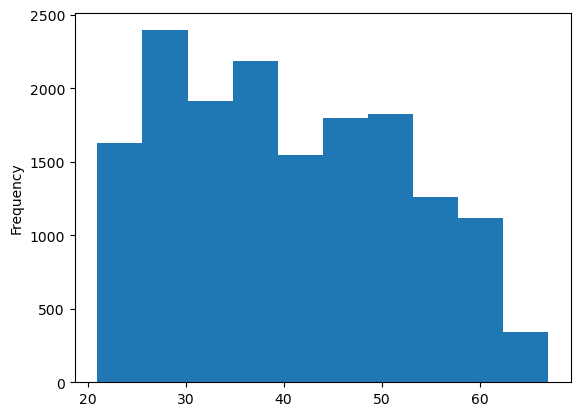

In [49]:
clients.AGE.plot(kind='hist');

в данных есть клиенты в возрасте от ~22 до ~67, выбросов и ошибок нет.

посмотрим на уникальные значения в колонках для выявдения ошибок

In [9]:
for col in clients.columns:
  print(col)
  print(clients[col].unique())
  print('******************')

ID
[106805103 106809308 106805867 ... 106809255 106814593 106813640]
******************
AGE
[42 28 64 54 26 63 32 52 47 23 31 25 37 46 62 50 30 41 27 61 38 51 58 35
 45 56 33 36 55 29 39 43 44 34 40 22 57 59 48 49 53 60 24 67 66 65 21]
******************
GENDER
[1 0]
******************
EDUCATION
['Среднее' 'Среднее специальное' 'Высшее' 'Неполное среднее'
 'Неоконченное высшее' 'Два и более высших образования' 'Ученая степень']
******************
MARITAL_STATUS
['Не состоял в браке' 'Состою в браке' 'Вдовец/Вдова' 'Гражданский брак'
 'Разведен(а)']
******************
CHILD_TOTAL
[ 1  2  0  3  4  6  5  8  7 10]
******************
DEPENDANTS
[0 1 2 3 4 6 7 5]
******************
SOCSTATUS_WORK_FL
[1 0]
******************
SOCSTATUS_PENS_FL
[0 1]
******************
REG_ADDRESS_PROVINCE
['Московская область' 'Читинская область' 'Иркутская область'
 'Новосибирская область' 'Красноярский край' 'Кабардино-Балкария'
 'Брянская область' 'Рязанская область' 'Ростовская область' 'Карелия'
 'Омская 

In [10]:
clients.ID.nunique()

16000

C таблицей clients все в порядке.

In [11]:
clients = pd.merge(clients, target[['ID_CLIENT','TARGET']], how = 'inner', left_on='ID', right_on='ID_CLIENT')
print(clients.shape)
clients.head()

(15223, 16)


,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,ID_CLIENT,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,106805103,1
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,106809308,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,106805867,0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,106808779,0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,106814289,0


Таблицы pens и works использовать не будем, так как такая же информация содержится уже в таблице clients.

Далее рассмотрим таблицы связанные с работой и зарплатой

In [12]:
jobs

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374
...,...,...,...,...,...
15218,Строительство,Специалист,Участие в основ. деятельности,48.0,106819588
15219,Здравоохранение,Другое,Участие в основ. деятельности,156.0,106819589
15220,Торговля,Служащий,Кадровая служба и секретариат,48.0,106819590
15221,NaN,NaN,NaN,NaN,106819591


In [13]:
# посморим есть ли различия в id клиентов  
len(set(clients.ID) - set(jobs.ID_CLIENT))

0

Отлично, таблицы можно джойнить, но сначала посмотрим получше на данные в таблице jobs

In [14]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GEN_INDUSTRY  13856 non-null  object 
 1   GEN_TITLE     13856 non-null  object 
 2   JOB_DIR       13856 non-null  object 
 3   WORK_TIME     13855 non-null  float64
 4   ID_CLIENT     15223 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 594.8+ KB


Есть пропуски во всех колонках кроме id.
Есть предположение, что это могут быть клиенты которые не работают и пропуск не является отсутсвием информации.
Но так же видим что у нас пропущенных значений в WORK_TIME на одно больше и тогда если моя предыдущая гипотеза верна, то у одного клиента статус работающего однако сведений о работе нет.

In [15]:
clients = pd.merge(clients, jobs, how = 'inner', on = 'ID_CLIENT')
clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,ID_CLIENT,TARGET,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,106805103,1,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,106809308,0,Торговля,Специалист,Участие в основ. деятельности,5.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,106805867,0,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,106808779,0,Государственная служба,Специалист,Участие в основ. деятельности,3.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,106814289,0,Другие сферы,Специалист,Участие в основ. деятельности,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0,106814680,0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0
15219,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0,106812464,0,Торговля,Специалист,Участие в основ. деятельности,24.0
15220,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0,106809255,0,Торговля,Специалист,Участие в основ. деятельности,36.0
15221,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,106814593,0,Транспорт,Специалист,Участие в основ. деятельности,36.0


In [16]:
clients[((clients.SOCSTATUS_WORK_FL == 1) & (clients.WORK_TIME.isna()))]

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,ID_CLIENT,TARGET,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME
4904,106812333,24,0,Среднее специальное,Не состоял в браке,0,0,1,0,Курская область,Курская область,Курская область,0,0,106812333,0,NaN,NaN,NaN,NaN


Гипотеза подтвердилась. От одной строчки ничего не изменится, пожтому просто избавимся от нее а не будем гадать ошибка ли это или коиент специально не сообщил информацию.

In [18]:
# так же нашлась еще такая строка, где есть инфомация о работе но нет информации о работе
# можно было бы заменить пропуск медианным значением для работников этой специальности и индустрии
# но для текущей задачи это не критично, поэтому просто избавимся от нее 
clients[(clients.WORK_TIME.isna()) & (clients.GEN_TITLE.isna() != True)]

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,ID_CLIENT,TARGET,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME
7047,106814217,55,1,Среднее,Состою в браке,2,0,0,1,Удмуртия,Удмуртия,Удмуртия,1,0,106814217,0,Строительство,Специалист,Участие в основ. деятельности,NaN


In [19]:
clients = clients[~((clients.SOCSTATUS_WORK_FL == 1) & (clients.WORK_TIME.isna()))]
clients = clients[~((clients.WORK_TIME.isna()) & (clients.GEN_TITLE.isna() != True))]
clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,ID_CLIENT,TARGET,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,106805103,1,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,106809308,0,Торговля,Специалист,Участие в основ. деятельности,5.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,106805867,0,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,106808779,0,Государственная служба,Специалист,Участие в основ. деятельности,3.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,106814289,0,Другие сферы,Специалист,Участие в основ. деятельности,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0,106814680,0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0
15219,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0,106812464,0,Торговля,Специалист,Участие в основ. деятельности,24.0
15220,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0,106809255,0,Торговля,Специалист,Участие в основ. деятельности,36.0
15221,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,106814593,0,Транспорт,Специалист,Участие в основ. деятельности,36.0


In [21]:
clients[((clients.SOCSTATUS_PENS_FL == 0) & (clients.JOB_DIR.isna()))].shape

(0, 20)

строки в которых пропущена инфа о работе и статус пенсионера = 0 отсутствуют, значит гипотеза о была верна.

Рассмотрим зарплату

In [22]:
salary

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620
...,...,...,...
15518,от 20000 до 50000 руб.,15000.0,106812538
15519,от 10000 до 20000 руб.,12000.0,106814158
15520,от 10000 до 20000 руб.,14000.0,106805134
15521,от 10000 до 20000 руб.,7000.0,106812867


In [23]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FAMILY_INCOME    15523 non-null  object 
 1   PERSONAL_INCOME  15523 non-null  float64
 2   ID_CLIENT        15523 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 363.9+ KB


In [25]:
salary.duplicated().sum()

300

В данных имеются дубли, избавимся от них

In [28]:
salary.drop_duplicates(inplace=True)
salary

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620
...,...,...,...
15518,от 20000 до 50000 руб.,15000.0,106812538
15519,от 10000 до 20000 руб.,12000.0,106814158
15520,от 10000 до 20000 руб.,14000.0,106805134
15521,от 10000 до 20000 руб.,7000.0,106812867


видим, что после удаления дублей строк осталось столько же сколко и в таблице clients(если вычесть 2 строки от которых мы избавились)

In [30]:
clients = pd.merge(clients, salary, how='inner', on="ID_CLIENT")
clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,FL_PRESENCE_FL,OWN_AUTO,ID_CLIENT,TARGET,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,1,0,106805103,1,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,0,0,106809308,0,Торговля,Специалист,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,0,1,106805867,0,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,1,1,106808779,0,Государственная служба,Специалист,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,1,0,106814289,0,Другие сферы,Специалист,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15216,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,0,0,106814680,0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,8000.0
15217,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,0,0,106812464,0,Торговля,Специалист,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,12000.0
15218,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,0,0,106809255,0,Торговля,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,9000.0
15219,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,0,0,106814593,0,Транспорт,Специалист,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,12000.0


Осталось разобраться с данными о кредитах и наша финальная табличка будет готова

In [44]:
loans = pd.merge(loan_history,loan_status, how='inner',on='ID_LOAN')\
          .groupby('ID_CLIENT',as_index=False)\
          .agg({'ID_LOAN':'count','CLOSED_FL':['sum', lambda x: len(x) - sum(x)]})

loans.columns = ['ID_CLIENT', 'LOAN_COUNT', 'CLOSED_LOANS','NOT_CLOSED_LOANS']
loans

,ID_CLIENT,LOAN_COUNT,CLOSED_LOANS,NOT_CLOSED_LOANS
0,106804370,1,1,0
1,106804371,1,1,0
2,106804372,2,1,1
3,106804373,1,1,0
4,106804374,2,1,1
...,...,...,...,...
15218,106819588,3,2,1
15219,106819589,1,0,1
15220,106819590,1,0,1
15221,106819591,1,0,1


In [46]:
loans = pd.merge(loans,last_credit, how='inner', on = 'ID_CLIENT')
loans

,ID_CLIENT,LOAN_COUNT,CLOSED_LOANS,NOT_CLOSED_LOANS,CREDIT,TERM,FST_PAYMENT
0,106804370,1,1,0,8000.00,6,8650.0
1,106804371,1,1,0,21650.00,6,4000.0
2,106804372,2,1,1,33126.00,12,4000.0
3,106804373,1,1,0,8491.82,6,5000.0
4,106804374,2,1,1,21990.00,12,4000.0
...,...,...,...,...,...,...,...
15218,106819588,3,2,1,13450.00,10,1500.0
15219,106819589,1,0,1,8991.00,6,4000.0
15220,106819590,1,0,1,2700.00,6,800.0
15221,106819591,1,0,1,24357.00,10,17930.0


In [47]:
clients = pd.merge(clients,loans, how='inner', on = 'ID_CLIENT')
clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,LOAN_COUNT,CLOSED_LOANS,NOT_CLOSED_LOANS,CREDIT,TERM,FST_PAYMENT
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,1,0,1,5588.0,6,1000.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0,1,0,1,19498.0,12,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0,1,1,0,15470.0,3,15000.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,1,0,1,13960.0,6,2500.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0,2,2,0,11890.0,6,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15216,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,8000.0,2,2,0,11750.0,4,1900.0
15217,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,12000.0,1,0,1,12350.0,6,1380.0
15218,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,9000.0,1,0,1,4915.0,10,2000.0
15219,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,12000.0,1,1,0,5860.0,3,2000.0


In [48]:
clients.columns

Index(['ID', 'AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'OWN_AUTO', 'ID_CLIENT',
       'TARGET', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'WORK_TIME',
       'FAMILY_INCOME', 'PERSONAL_INCOME', 'LOAN_COUNT', 'CLOSED_LOANS',
       'NOT_CLOSED_LOANS', 'CREDIT', 'TERM', 'FST_PAYMENT'],
      dtype='object')

Удалим ненужные колонки POSTAL_ADDRESS_PROVINCE и ID_CLIENT

In [49]:
clients.drop(columns=['POSTAL_ADDRESS_PROVINCE','ID_CLIENT'], axis=1, inplace=True)
clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,LOAN_COUNT,CLOSED_LOANS,NOT_CLOSED_LOANS,CREDIT,TERM,FST_PAYMENT
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,1,0,1,5588.0,6,1000.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0,1,0,1,19498.0,12,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0,1,1,0,15470.0,3,15000.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,1,0,1,13960.0,6,2500.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0,2,2,0,11890.0,6,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15216,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,8000.0,2,2,0,11750.0,4,1900.0
15217,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,12000.0,1,0,1,12350.0,6,1380.0
15218,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,9000.0,1,0,1,4915.0,10,2000.0
15219,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,12000.0,1,1,0,5860.0,3,2000.0


Датасет готов, остальной анализ будет уже в Stremlit